다중공선성 문제
이러한 다중공선성 문제를 해결하기 위한 2가지 방법:

1.Ridge Regression : L2 규제화된 Linear Regression
2.Lasso Regression : L1 규제화된 LInear Regression

위 2가지 방법은 결국 작은 노이즈까지 학습하는 것을 방지하기 위해 w이 절대값이 커지는 것을 방지(규제)하는 방법을 사용합니다.

- Ridge Regression:
Loss(w)=∑i(y−y^)2+α||w||2 

상대적으로 정확도가 높다


- Lasso Regression:
Loss(w)=∑i(y−y^)2+α|w| 

더 적은 변수로 예측이 가능하다. (덜 중요한 변수는 포기)
예측시간이 빠르다. 더 좋은 장점을 갖다.
사업적용이 용이하다.
ElasticNet Regression:
Loss(w)=∑i(y−y^)2+α(β|w|+(1−β)||w||2) 

w ~ 0.1

Ridge 규제항:  |w|2∼0.01  => 대부분 변수의 weight를 작은 값.
Lasso 규제항:  |w|∼0.1  => 설명력이 낮은 변수들의 weight ~ 0

규제항을 도입한 Ridge, Lasso의 공통적인 단점:

1.기존 Loss인 MSE와 |W|에 대한 규제간의 weight factor인  α 를 튜닝해야 함.
튜닝이란? 우리가 가지고 있는 데이터 X, y에 적합한  α 를 찾는 일
여러개의  α 를 가지고 있는 모델을 학습해서, 테스트 데이터에서의  R2 가 더 좋은 것을 선택하는 일
2.p 개의 변수들을 모두 동일한 스케일로 맞추어야 한다. Scaling이라 한다.
큰 단위로 측정한 작은값변수와 작은 단위로 측정한 큰값변수가 있을 때
큰 단위로 측정한 작은값변수의 weight는 커져야 하는데, 규제항에 의해 그 중요도(weight)를 줄일 수 밖에 없고, 어떤 경우는 그 정보를 상실하게 된다.
이는 Ridge, Lasso 모두 모든 회귀계수에 일률적인 규제강도  α 를 가지기 때문
변수의 스케일 간의 차이에 의해 발생하는 이러한 문제를 해결하기 위해서는 학습전 모든 변수들을 같은 스케일을 가지도록 조정해줘야 한다.

### 인슐린 데이터 이용 의료비 예측 모델

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('insurance.csv.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [4]:
df.describe()   #다양한 통계량을 요약해서 보여줌

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


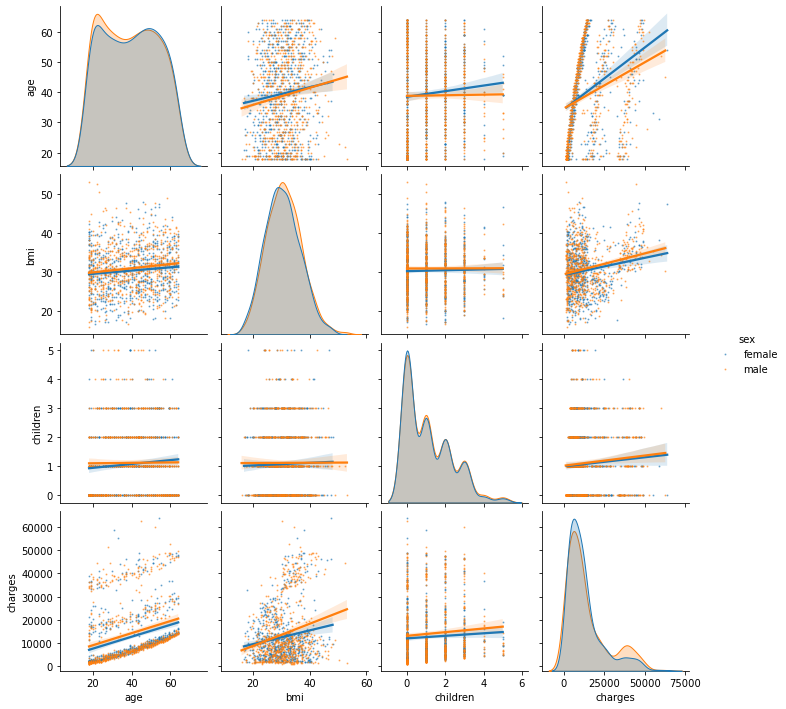

In [5]:
import seaborn as sns
sns.pairplot(df, kind='reg', hue='sex',plot_kws={'scatter_kws': {'alpha': 0.5, 's': 1}})# 데이터, 그래프종류, 나눌 성분, 투명도

- bmi가 약 30 이상일 때 charges에 대한 2분포가 형성되는 것으로 보인다.
- age와 charges의 산점도에서 3개의 분포가 나타나는 것이 확인된다.
- children을 범주형으로 보는 것이 유용하다.

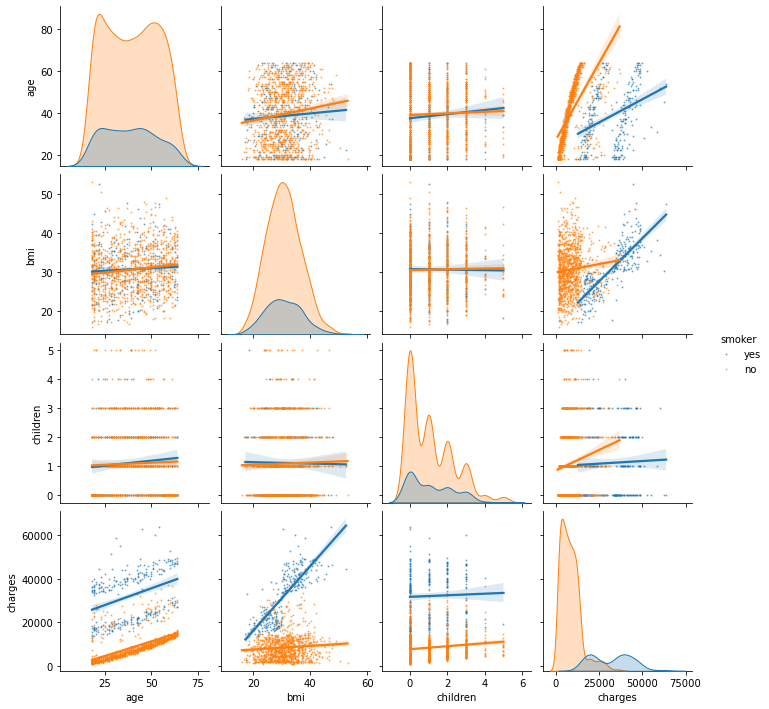

In [6]:
sns.pairplot(df, kind='reg', hue='smoker',plot_kws={'scatter_kws': {'alpha': 0.5, 's': 1}})

- 흡연여부에 따라 bmi에 대한 회귀계수가 달라지는 것이 명확하다.
- 특히 bmi 30을 기준으로 흡연자인 경우 2개의 분포를형성하며, 그 분산이 bmi에 따라 더 증가한다.

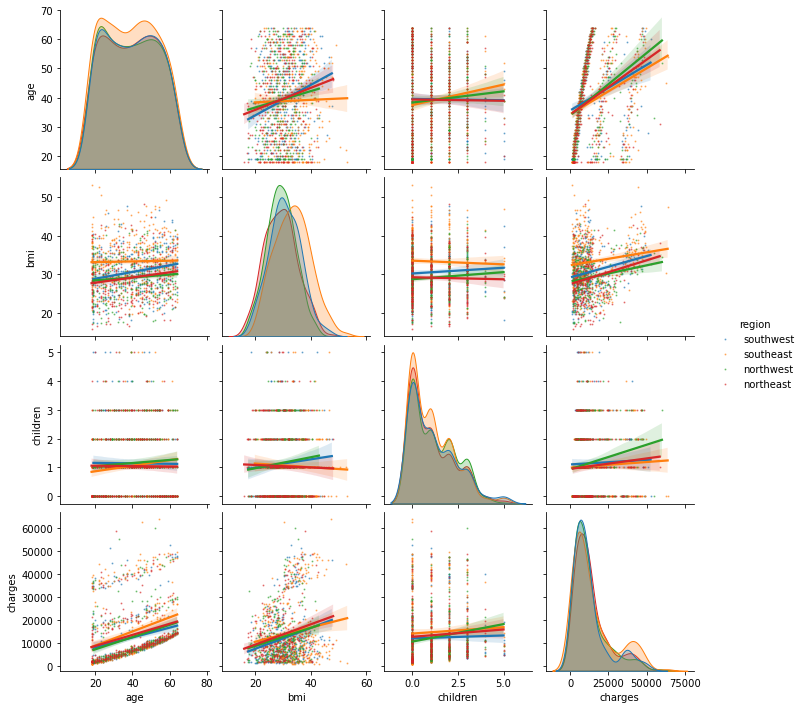

In [7]:
sns.pairplot(df, kind='reg', hue='region',plot_kws={'scatter_kws': {'alpha': 0.5, 's': 1}})

In [8]:
df['bmi30'] = np.where(df.bmi > 30, 1, 0) # 그래프 분석결과를 토대로 bmi 30 이상은 1로 데이터 추가
df

,age,sex,bmi,children,smoker,region,charges,bmi30
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,1
1335,18,female,36.850,0,no,southeast,1629.83350,1
1336,21,female,25.800,0,no,southwest,2007.94500,0


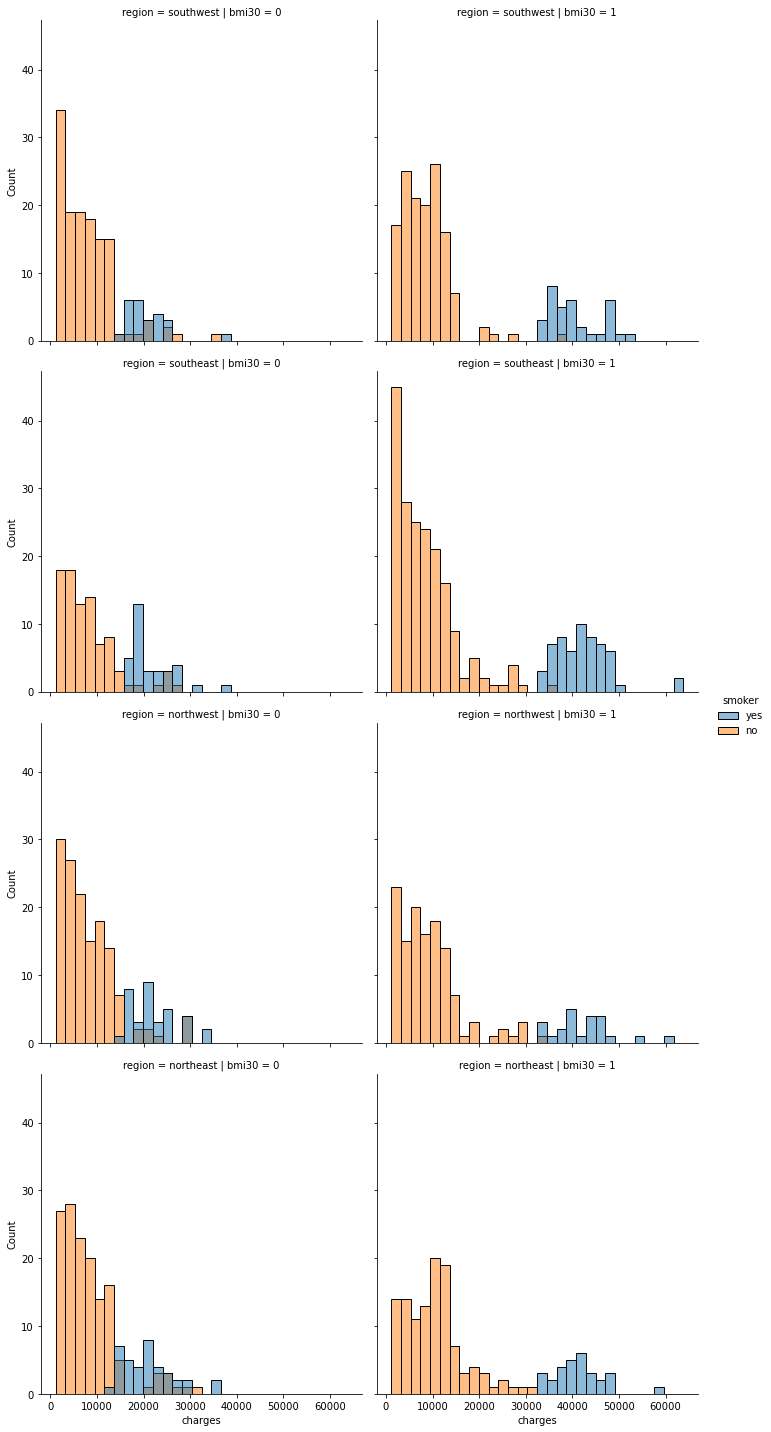

In [9]:
sns.displot(df, x='charges', hue='smoker',
            row='region', col='bmi30', )  ### 지역별로 bmi 30을 기준으로 나누며 x축을 인슐린 수치 통해 흡연과의 관계성 확인

#### 기본 데이터의 LinearRegression 스코어 확인

In [10]:
from sklearn.model_selection import train_test_split
X = pd.get_dummies(df.iloc[:, :-2], drop_first=True)        ### 데이터 프레임 끝에서 2행제외
y = df.charges

X_train, X_test, y_train, y_test = train_test_split(X, y)
base = LinearRegression()
base.fit(X_train, y_train)
baseScore = base.score(X_test, y_test)
baseScore

0.7593113195694071

#### 분석을 토대로 데이터 전처리(수정)
- children은 범주형으로 변환
- bmi30과 smoker와의 교호작용 존재
- bmi에 대한 2차항 필요
- 범주형 변수에 대한 one-hot-encoding

### 질문) 숫자 범주형은 원 핫 인코딩과 다르게 학습에 영향을 끼치는가? bmi 2차항은 왜 필요한가?

In [11]:
df.children = df.children.astype('str')             #범주형으로 변환(숫자 의미 X)
df.smoker = np.where(df.smoker=='yes', 1, 0)        #새로운행 계산위해
df.sex = np.where(df.sex=='male', 1, 0)             #//
df['bmi2sq'] = df.bmi ** 2
df['bmi30smk'] = df.bmi30 * df.smoker
df['bmismk'] = df.bmi * df.smoker
df['bmi2sqsmk'] = df.bmi2sq * df.smoker
df['bmisex'] = df.bmi * df.sex

X = pd.get_dummies(df.drop('charges', axis=1), drop_first=True)     #타겟 값 제외 원 핫 인코딩 후 X값
y = df.charges
X_train, X_test, y_train, y_test = train_test_split(X, y)
reg = LinearRegression()
reg.fit(X_train, y_train)
regScore = reg.score(X_test, y_test)
regScore, baseScore

(0.8705956421337644, 0.7593113195694071)

#### 질문 클론 enumerate

In [37]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
ms, als = [Ridge(max_iter=5000), Lasso(max_iter=5000)], range(-4, 3)  #작은 알파 값 사용을 위해 맥스 이터 사용해야함
best = {}
best['score'] = regScore
for i, ms  in enumerate(ms):
    for a in als:
        params = {'alpha':10**a}
        ms.set_params(**params)
        ms.fit(X_train, y_train)
        s = ms.score(X_test, y_test)
        if s > best['score']:
            best['score'] = s
            best['model'] = ms
print(best)

C:\Users\ICT01_07\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9794663811.465061, tolerance: 15017356.010256615
  model = cd_fast.enet_coordinate_descent(
C:\Users\ICT01_07\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9680668300.00693, tolerance: 15017356.010256615
  model = cd_fast.enet_coordinate_descent(
C:\Users\ICT01_07\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8614717424.53949, tolerance: 15017356.010256615
  model = cd_fast.enet_coordinate_descent(
C:\Users\ICT01_07\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conv

{'score': 0.8714047350925457, 'model': Lasso(alpha=100, max_iter=5000)}


C:\Users\ICT01_07\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310051996.4479656, tolerance: 15017356.010256615
  model = cd_fast.enet_coordinate_descent(


In [36]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.base import clone  #클론 사용으로 릿지 라쏘 동시에 for문 돌림.
ms, als = [Ridge(max_iter=5000), Lasso(max_iter=5000)], range(-4, 3)  #작은 알파 값 사용을 위해 맥스 이터 사용해야함
best = {}
best['score'] = regScore
for m in ms:
    for a in als:
        params = {'alpha':10**a}
        m = clone(m)
        m.set_params(**params)
        m.fit(X_train, y_train)
        s = m.score(X_test, y_test)
        if s > best['score']:
            best['score'] = s
            best['model'] = m
best

C:\Users\ICT01_07\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9794663811.465061, tolerance: 15017356.010256615
  model = cd_fast.enet_coordinate_descent(
C:\Users\ICT01_07\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9680668300.00693, tolerance: 15017356.010256615
  model = cd_fast.enet_coordinate_descent(
C:\Users\ICT01_07\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8614717424.53949, tolerance: 15017356.010256615
  model = cd_fast.enet_coordinate_descent(
C:\Users\ICT01_07\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conv

{'score': 0.8714047350925457, 'model': Lasso(alpha=10, max_iter=5000)}

## DecisionTreeRegressor
1.target y의 분산감소량을 최소화하는 split point를 찾고

2.split point로 2개의 집단으로 나누어 전체 분산을 감소시키고

3.1 ~ 2 방법을 반복하면서, 어떤 tolerence 값 이하가 되면 중단

4.새로운 데이터에 대한 예측은 새로운 데이터가 도달한 leaf에서

5.leaf에 있는 학습 데이터의 y 평균값으로 예측
- 마치 연속된 값을 예측하는 듯 하지만,
- 실제로는 leaf의 수 만큼의 실수의 범주값을 예측한다.
- 학습 데이터에서 split point로 사용된 연속된 변수의 범위를 넘어서는 값을 가지는 테스트 데이터의 경우(외삽) 항상 상수값을 예측

In [39]:
insu2 = pd.read_csv('./insurance.csv.csv')
insu2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
insu2.info()            ##마찬가지로 오브젝트 를 바꿔줘야 fit가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [41]:
from sklearn.preprocessing import LabelEncoder              ### 전체 원 핫 인코딩도 가능하지만 사이킷런 라이브러리 라벨 인코더를 이용하여                                                             ### 바꾸면 원 핫 인코딩보다 용량을 줄일수있음. 트리류는 범주형 데이터를 원 핫 인코딩 변환시키지 않아도 
encoder = LabelEncoder()                                    ### 바꾸면 원 핫 인코딩보다 용량을 줄일수있음. 트리류는 범주형 데이터를 원 핫 인코딩 변환시키지 않아도 
insu2['sex'] = encoder.fit_transform(insu2.sex)             ### 분류 자체를 범주형으로 바꿔줌(장점이자 단점)
insu2['smoker'] = encoder.fit_transform(insu2.smoker)
insu2['region'] = encoder.fit_transform(insu2.region)    

insu2

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [43]:
insu2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(insu2.iloc[:, :-1], 
                                                        insu2.iloc[:, -1],
                                                        random_state=42)

dtr = DecisionTreeRegressor()
dtr.fit(X_train2, y_train2)
baseS = dtr.score(X_test2, y_test2)
baseS

0.7331555672864394

In [46]:
dtr.get_params()        #옵션 파라메타

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [47]:
from sklearn.model_selection import GridSearchCV
# max_depth=None, min_samples_leaf=1, max_leaf_nodes=None
params = {'max_depth':range(3, 9),  #max_depth : 트리의 최대 깊이 (값이 클수록 모델의 복잡도가 올라간다.)
          'min_samples_leaf':range(1, 10),  #min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default : 1)
          'max_leaf_nodes':range(8, 25, 2)} #리프 노드(말단 노드)의 최대수

grid = GridSearchCV(dtr, params, n_jobs=-1)
grid.fit(X_train2, y_train2)
bestS = grid.score(X_test2, y_test2)
bestS

0.8478903274924622

In [51]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=16, min_samples_leaf=3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
